In [1]:
from identity_cluster.cluster import FaceCluster, cluster
from identity_cluster.base import detect_faces

import os
from util import get_video_config
import json


c:\Users\ASUS\Desktop\Phosphene.AI\testenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Get Clustered Identities**

In [2]:
video_path = "C://Users//ASUS//Desktop//Phosphene.AI//FFIW10K-v1-release//target//train//train_00000000.mp4"

In [ ]:
clust = FaceCluster()
faces, fps = detect_faces(video_path, "cuda:0")
clustered_faces = cluster(clust, video_path, faces)

**Save Identities**

In [ ]:
destination_path = "pah/to/save"

In [ ]:
video_config = {}
video_config["path"] = video_path
video_config["fps"] = fps
for identity in list(clustered_faces.keys()):
                    
                    if not clustered_faces[identity]:
                        ### If no faces in a specific cluster
                        continue

                    ### Create a folder for each identity
                    identity_dir = os.path.join(destination_path,str(identity)) ## Stored ad path in the array

                    if not os.path.exists(identity_dir):
                        os.mkdir(identity_dir)
                        
                    config = get_video_config(clustered_faces, identity, identity_dir)
                
                    with open(os.path.join(identity_dir,f"{identity}_info.json"),"w") as f:
                        json.dump(config,f)
                #     identities.append(config)
                # video_config["Identities"] = identities
with open(os.path.join(destination_path,f"{os.path.basename(video_path)}.json"),"w") as f:
        json.dump(video_config,f)

**Inference**

In [ ]:
#Inference
from identity_cluster.models.models_list import ModelList
from identity_cluster.Inference import Inference

In [28]:
infer = Inference("cuda")

**Inference.inference_models**

Allows you to verify models for a single video,

Args : 

    video_path (str): Path to the video file.

    model_name (str): Name of the model to verify.

    model_path (str): Path to the model weights.

    save_result_vid (bool, optional): If True, save the result video with detected faces. Defaults to False.
    
    save_path (str, optional): Path to save the result video. Defaults to None.

    print_timings (bool, optional): If True, print timing information. Defaults to False.

    padding_constant (int, optional): Constant value to control the face-background ratio. Defaults to None( a padding constant of 3 is used in this case)

Returns :

    Dict[int,Dict[str, Any]] -> list of dictionaries containing prediction results for each identity in the video video


```
{                                                        
    0 : {                                                 
        "class" : "Fake",                                 
        "confidence" : 0.99,                            
        "data" : [                                        
            (0,PIL.Image.Image,[234,324,32243,323]),         
            (1,PIL.Image.Image,[342,3234,232,121])                
        ]                                                            
    }                                                            
}
```

generate_video_data --calls--> __cvt_to_rgb: 13.6902 seconds
Timings for generate_video_data


time for face detection: 6.301790237426758 seconds
time for face cropping: 1.068617343902588 seconds
time for face clustering: 2.3223276138305664 seconds
time for subprocess -> to convert to RBG: 13.715288877487183 seconds
inference_models --calls--> get_predictions: 1.7455 seconds
Identity : Real


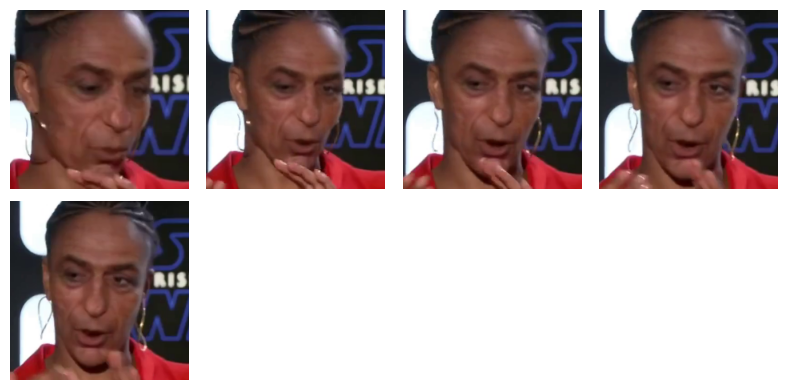

__print_result --calls--> __plot_images_grid: 0.2774 seconds
inference_models --calls--> __create_sequence_dict: 0.0000 seconds
Video processing complete. Output saved to: C://Users//ASUS//Desktop//Phosphene.AI//vid4.mp4
inference_models --calls--> __draw_bounding_boxes: 2.3422 seconds
<module> --calls--> inference_models: 30.6470 seconds


In [31]:
res = infer.inference_models("C://Users//ASUS//Desktop//Phosphene.AI//FFIW10K-v1-release//target//train//train_00000001.mp4","resnet50_lstm","C://Users//ASUS//Downloads//best_model_20240904-171909.pth", save_result_vid=True, save_path="C://Users//ASUS//Desktop//Phosphene.AI//vid4.mp4", print_timings=True, padding_constant=2)

**Inference.get_data**

This function takes in a video, and returns the following information,

Tuple(List[int], Dict[int,List[float]], List[PIL.Image.Image], int, Dict[int,List[Tuple(int,PIL.Image.Image,bbox)]])

Args :

    video_path : str -> Path to the video

    print_timings : bool -> Whether to print timing information

    padding_constant (int, optional): Constant value to control the face-background ratio. Defaults to None( a padding constant of 3 is used in this case)

Returns :

    List of frame numbers - List[int]

    Dict of bounding boxes for each identity in each frame - Dict[int,List[List[float]]]

    List of images in order of frame number and identity present in each frame in the dictionary object - List[PIL.Image.Image]
    
    Fps of the video - int
        
    Dict of clustered identities - Dict[int,List[Tuple(int,PIL.Image.Image,bbox)]]

In [ ]:
res = infer.get_data("C://Users//ASUS//Desktop//Phosphene.AI//FFIW10K-v1-release//target//train//train_00000010.mp4")

**Inference.get_predictions**

A function not intended to be used directly, but it can be used to get results from the given model and data, the returns results are just the logits from the model and whether the identity is Real or Fake, this function is identity level function and does not take the entire video as input

Args :

    model : nn.Module

    images : torch.Tensor[frames, height, width, channel]

    device : str -> "cuda"

    print_time : bool -> False

Returns :
    
    results : Dict[str, Any] -> returns logits and argmax of the logits

In [ ]:

model = ModelList.get_model("resnet50_lstm", "C://Users//ASUS//Downloads//best_model_20240904-171909.pth", "cuda")
data = infer.generate_video_data("C://Users//ASUS//Desktop//Phosphene.AI//FFIW10K-v1-release//target//train//train_00000010.mp4")
res = infer.get_predictions(model,data,"cuda",False)